<a href="https://colab.research.google.com/github/Saichandan37/pytorch-projects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [17]:
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize((0.5,), (0.5,))
])
train = torchvision.datasets.MNIST(root='./Data', train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST(root='./Data', train=False, download=True, transform=transform)

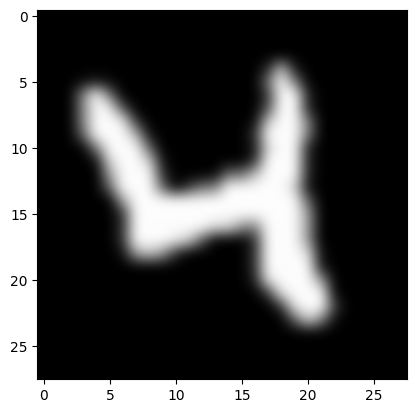

In [18]:
image,label=train[20]
plt.imshow(image.squeeze(),cmap='gray',interpolation='bicubic')
train_loader=torch.utils.data.DataLoader(train,batch_size=100,shuffle=True)


In [19]:
image.shape

torch.Size([1, 28, 28])

Create CNN Model

In [20]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv=nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1,padding=2),
        nn.MaxPool2d(stride=2,kernel_size=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.ReLU()

    )
    # Calculate the input size for the linear layer
    # The output size of the last conv layer for a 28x28 input image
    # after the two conv and maxpool layers with the specified parameters
    # is 32 * 7 * 7.
    self.fc=nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(in_features=32*7*7,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=10)
    )

  def forward(self,x):
    out=self.conv(x)
    out=out.view(out.size(0),-1)
    out=self.fc(out)
    return out

In [21]:
model=CNN()

In [22]:
critirion=nn.CrossEntropyLoss()
optimizer=optim.Adam(params=model.parameters(),lr=0.01)

In [23]:
# check_point={'model':model.state_dict,'optimizer':optim.state_dict}
# torch.save(check_point,"CNN.pth")

In [24]:
# import torch
# import torch.nn as nn
# import torchvision
# import torchvision.transforms as transforms
# import torch.optim as optim
# import matplotlib.pyplot as plt
# train=torchvision.datasets.CIFAR10(root='./Data',train=True,download=True,transform=transforms.transforms.ToTensor())
# image,label=train[20]
# plt.imshow(image.squeeze(),interpolation='bicubic')
# dataloader=torch.utils.data.DataLoader(train,batch_size=100,shuffle=True)

# class CNN(nn.Module):
#   def __init__(self, input_size, output_size):
#     super().__init__(input_size, output_size)
#     self.conv=nn.Sequential(
#         torch.conv2d(input=32,)
#     )

In [26]:
loss_list=[]
accuracy_list=[]

test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False) # Add a DataLoader for the test set

# Resume training from where it was interrupted
start_epoch = epoch + 1 # Start from the next epoch
model.train()
for epoch in range(start_epoch, 30):
  epoch_loss=0
  for image,label in train_loader:
    y_pred=model(image)
    loss=critirion(y_pred,label)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss+=loss
  loss_list.append(epoch_loss/len(train_loader))
  print(f"Epoch {epoch+1} training loss: {epoch_loss/len(train_loader)}")


model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  epoch_loss=0
  for image,label in test_loader: # Iterate through the test_loader
    y_pred=model(image)
    predicted = torch.argmax(y_pred, dim=1)
    total += label.size(0)
    correct += (predicted == label).sum().item()
    loss=critirion(y_pred,label)
    epoch_loss+=loss
  accuracy = 100 * correct / total
  accuracy_list.append(accuracy)
  loss_list.append(epoch_loss/len(test_loader)) # Divide by len(test_loader) instead of len(test)
  print(f"Epoch {epoch+1} test loss: {epoch_loss/len(test_loader)}, test accuracy: {accuracy}%")

Epoch 13 training loss: 0.24996358156204224
Epoch 14 training loss: 0.1181124597787857
Epoch 15 training loss: 0.10115136206150055
Epoch 16 training loss: 0.09238315373659134
Epoch 17 training loss: 0.09158914536237717
Epoch 18 training loss: 0.08921139687299728
Epoch 19 training loss: 0.08683507889509201
Epoch 20 training loss: 0.08331261575222015
Epoch 21 training loss: 0.08448822051286697
Epoch 22 training loss: 0.08484561741352081
Epoch 23 training loss: 0.08042562752962112
Epoch 24 training loss: 0.08209417015314102
Epoch 25 training loss: 0.07654978334903717
Epoch 26 training loss: 0.07753051817417145
Epoch 27 training loss: 0.07804583758115768
Epoch 28 training loss: 0.07363072037696838
Epoch 29 training loss: 0.08322367072105408
Epoch 30 training loss: 0.07429240643978119
Epoch 30 test loss: 0.044461317360401154, test accuracy: 98.74%


In [27]:
torch.save(model.state_dict(),"CNN_MNIST.pth")